# Cheap Models

In [1]:
# Copied and pasted from my imports from project 3, 
# delete if we dont need(Aerika)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

import regex as re

from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('../data/data_income.csv')
df.head()

,Unnamed: 0,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,ave_agi
0,0,いざかや-おせん-izakaya-osen-los-angeles,"['sushi', 'izakaya', 'seafood']",Los Angeles,us0WnDOySVXXXwCqs0AaCw,34.083192,-118.273245,$$,4.5,651.0,90026.0,44.191297
1,1,yummy-crepe-stand-los-angeles,"['streetvendors', 'creperies']",Los Angeles,xFMzCotq4cURN37cvTr9eQ,34.078743,-118.263756,$,4.5,3.0,90026.0,44.191297
2,2,yum-yum-shave-ice-los-angeles-2,"['shavedice', 'foodstands']",Los Angeles,Tub-psQGYAjbtny6MnfQmg,34.077049,-118.258873,$,5.0,2.0,90026.0,44.191297
3,3,yoga-urt-los-angeles,"['icecream', 'juicebars', 'vegan']",Los Angeles,vsRKNraKeeddoOXL2btQ5A,34.077688,-118.265555,$,4.5,46.0,90026.0,44.191297
4,4,yami-yaki-los-angeles-2,['teppanyaki'],Los Angeles,Bcp6NEv7CGTOtnIgvo6Unw,34.077917,-118.263523,$,4.5,74.0,90026.0,44.191297


In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
# I Added this part to Notebook 02, will delete later once jerry's business grabber gets us the 
# final dataset!

df['price'] = df['price'].replace('$', 1)
df['price'] = df['price'].replace('$$', 2)
df['price'] = df['price'].replace('$$$', 3)
df['price'] = df['price'].replace('$$$$', 4)

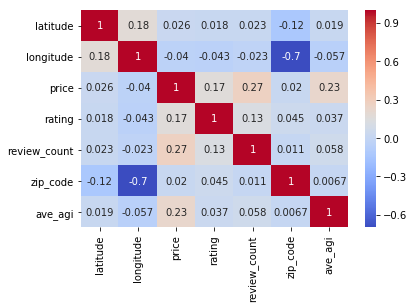

In [5]:
sns.heatmap(df.corr(),
           annot = True,
           cmap = 'coolwarm')

# KMeans Clustering

In [6]:
df._get_numeric_data()

,latitude,longitude,price,rating,review_count,zip_code,ave_agi
0,34.083192,-118.273245,2,4.5,651.0,90026.0,44.191297
1,34.078743,-118.263756,1,4.5,3.0,90026.0,44.191297
2,34.077049,-118.258873,1,5.0,2.0,90026.0,44.191297
3,34.077688,-118.265555,1,4.5,46.0,90026.0,44.191297
4,34.077917,-118.263523,1,4.5,74.0,90026.0,44.191297
...,...,...,...,...,...,...,...
9664,33.990845,-118.460079,3,5.0,6.0,90290.0,153.772000
9665,33.822453,-118.301476,3,5.0,3.0,90501.0,56.521919
9666,33.893440,-118.352870,1,5.0,20.0,90260.0,39.781789
9667,34.127140,-118.059020,2,5.0,30.0,91007.0,82.902334


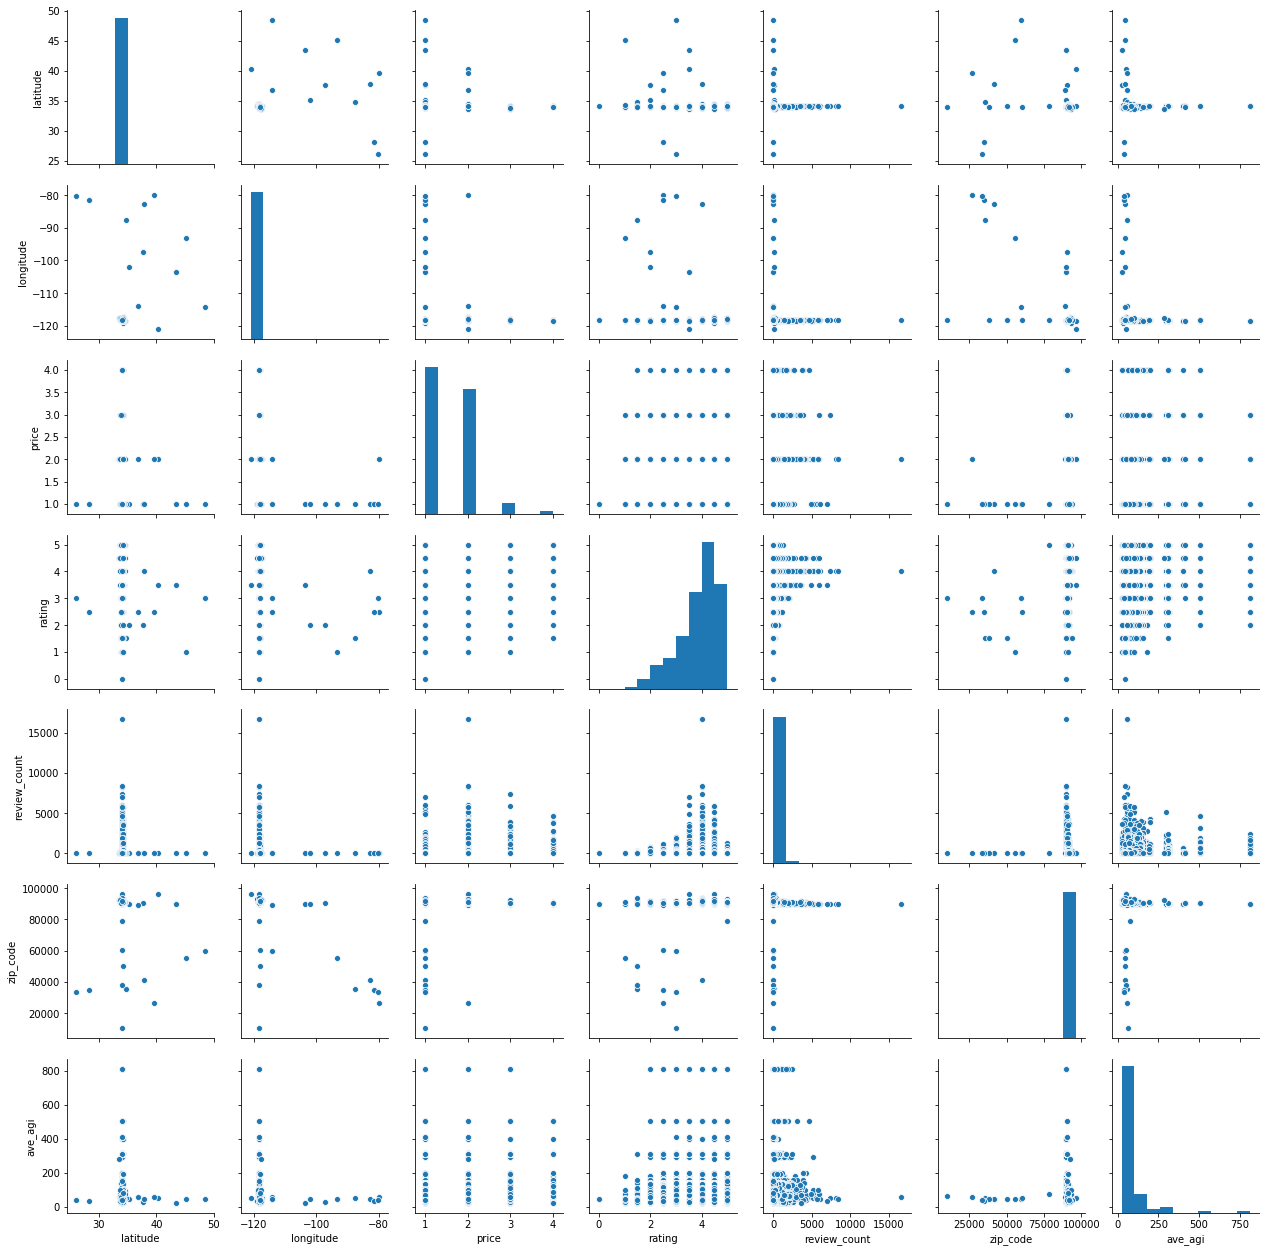

In [7]:
# Try to pick interesting columns for clustering

sns.pairplot(df._get_numeric_data())

In [12]:
# Function to create KMeans Clustering for 2 features from original dataframe

def kmean(var1, var2):
    features = [var1, var2]
    X = df[features]

    sc = StandardScaler()
    X = sc.fit_transform(X)

    km = KMeans(n_clusters=3,
           random_state=42)
    km.fit(X)

    df_copy = df.copy()
    df_copy['cluster'] = km.labels_

    print(f' Cluster Centers: \n{km.cluster_centers_}')

    centroids = pd.DataFrame(
        sc.inverse_transform(km.cluster_centers_),
        columns = features
    )

    print(f' Centroids for Plot: \n{centroids}')


    # Visualizing Clusters
    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["red", "green", "blue"]
    df_copy['color'] = df_copy['cluster'].map(lambda p: colors[p])

    ax = df.plot(    
        kind="scatter", 
        x=var1, y=var2,
        figsize=(10,8),
        c = df_copy['color']
    )

    centroids.plot(
        kind="scatter", 
        x=var1, y=var2, 
        marker="*", c=["r", "g", "b"], s=550,
        ax=ax
    );

 Cluster Centers: 
[[-1.38295742e-02 -2.75422591e-02]
 [ 3.07036332e+01  2.51794452e+01]
 [-1.68760376e+01  3.83271839e+01]]
 Centroids for Plot: 
    latitude   longitude
0  34.043235 -118.306011
1  42.001928  -95.173220
2  29.674347  -83.107364


<Figure size 504x504 with 0 Axes>

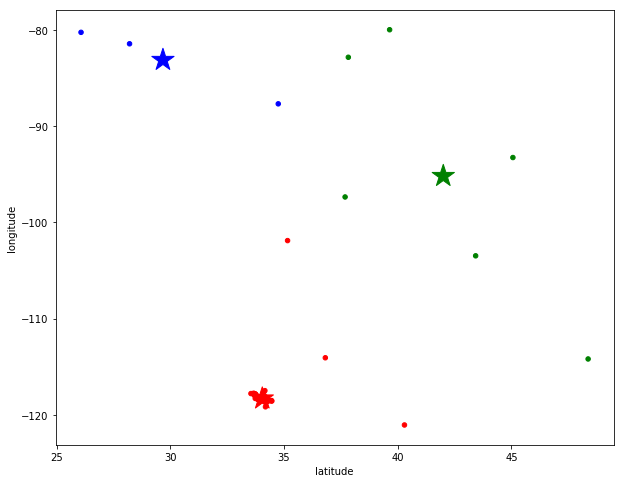

In [13]:
kmean('latitude', 'longitude')

 Cluster Centers: 
[[-2.35290067e-02  3.17512065e-02]
 [ 3.71081436e+01 -2.94086196e+01]
 [ 9.18857004e-01 -2.60402869e+01]]
 Centroids for Plot: 
    longitude      zip_code
0 -118.302328  90145.533754
1  -84.226094  37814.500000
2 -117.437488  43801.800000


<Figure size 504x504 with 0 Axes>

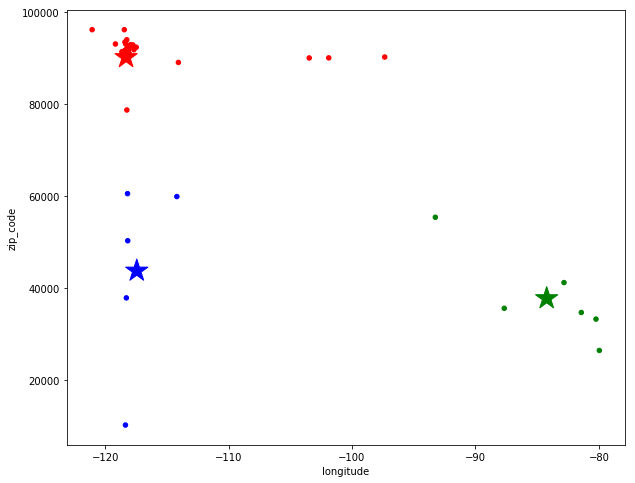

In [14]:
kmean('longitude', 'zip_code')

 Cluster Centers: 
[[-1.48260215e-02  3.14104349e-02]
 [-1.66175204e+00 -3.00191747e+01]
 [ 3.95289579e+01 -8.28164683e+00]]
 Centroids for Plot: 
    latitude      zip_code
0  34.042977  90144.928024
1  33.616269  36729.222222
2  44.288512  75368.250000


<Figure size 504x504 with 0 Axes>

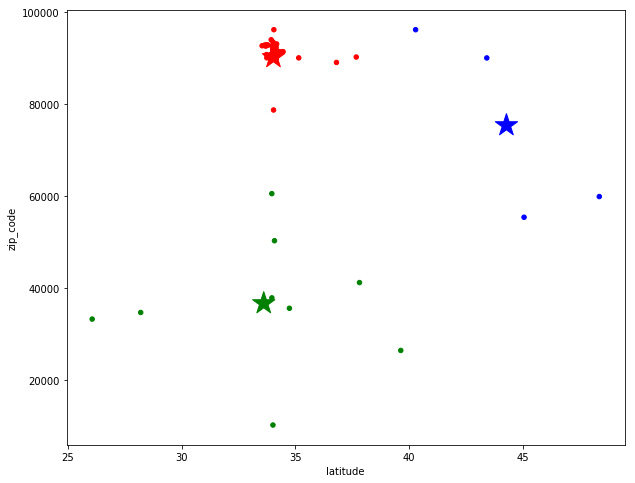

In [15]:
kmean('latitude', 'zip_code')

Jerry's code from previous project, trying to use it to perform a bunch of different models for this project  
Still need to tweak functions so they can be used for this project.

In [9]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
# numeric columns that seem like continuous features.
numeric_features = ['price', 'rating', 'review_count', 'ave_agi']

# columns that should get dummied out
categorical_features = ['zip_code']

In [12]:
# transforms numeric columns
# just comment out whichever transformers you want to leave out

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, 
                                interaction_only=False)),
    ('power', PowerTransformer()),
#     ('imputer', SimpleImputer(strategy=)),
    ('scaler', StandardScaler())
])

In [13]:
# transforms categorical columns into dummy columns

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
filter_transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [16]:
# put alias as keys to dictionary
# put instantiation of model, including parameters you don't want to gridsearch, as value

est_dict = {
    'logreg': LogisticRegression(solver='lbfgs'),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier(n_estimators=100, random_state=111),
    'extra': ExtraTreesClassifier(n_estimators=100, random_state=111),
    'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=111)
}

# list of aliases so we can loop through models
estimators = ['logreg', 'knn', 'rand', 'extra', 'ada']

NameError: name 'LogisticRegression' is not defined

In [17]:
'''
to access parameters, follow this format:

grid_params = {'filter__num__poly__param': [],
    'estimatoralias__param': []
    }
'''

pipe = Pipeline([
    ('filter', filter_transformer),
    ('estimator', Estimator())
])

NameError: name 'Estimator' is not defined